In [5]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
from scipy.stats import shapiro
from scipy.stats import kruskal
from itertools import combinations
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_rel
from scipy.stats import t

**Importing data from the json file + preliminaries**

In [6]:
def lighten_color(color, alpha):
    return mcolors.to_rgba(color, alpha=alpha)


with open("data.json", "r") as f:
    all_data = json.load(f)

CPDAG_mean_ROC_skelN10 = all_data["CPDAG_mean_ROC_skelN10"]
CPDAG_mean_ROC_skel = all_data["CPDAG_mean_ROC_skel"]
CPDAG_mean_ROC_skelN100 = all_data["CPDAG_mean_ROC_skelN100"]

CPDAG_rest_ROC_skelN10 = all_data["CPDAG_rest_ROC_skelN10"]
CPDAG_rest_ROC_skel = all_data["CPDAG_rest_ROC_skel"]
CPDAG_rest_ROC_skelN100 = all_data["CPDAG_rest_ROC_skelN100"]

CPDAG_mean_ROC_cpdagN10 = all_data["CPDAG_mean_ROC_cpdagN10"]
CPDAG_mean_ROC_cpdag = all_data["CPDAG_mean_ROC_cpdag"]
CPDAG_mean_ROC_cpdagN100 = all_data["CPDAG_mean_ROC_cpdagN100"]

CPDAG_rest_ROC_cpdagN10 = all_data["CPDAG_rest_ROC_cpdagN10"]
CPDAG_rest_ROC_cpdag = all_data["CPDAG_rest_ROC_cpdag"]
CPDAG_rest_ROC_cpdagN100 = all_data["CPDAG_rest_ROC_cpdagN100"]

CPDAG_mean_PR_skelN10 = all_data["CPDAG_mean_PR_skelN10"]
CPDAG_mean_PR_skel = all_data["CPDAG_mean_PR_skel"]
CPDAG_mean_PR_skelN100 = all_data["CPDAG_mean_PR_skelN100"]

CPDAG_rest_PR_skelN10 = all_data["CPDAG_rest_PR_skelN10"]
CPDAG_rest_PR_skel = all_data["CPDAG_rest_PR_skel"]
CPDAG_rest_PR_skelN100 = all_data["CPDAG_rest_PR_skelN100"]

CPDAG_mean_PR_cpdagN10 = all_data["CPDAG_mean_PR_cpdagN10"]
CPDAG_mean_PR_cpdag = all_data["CPDAG_mean_PR_cpdag"]
CPDAG_mean_PR_cpdagN100 = all_data["CPDAG_mean_PR_cpdagN100"]

CPDAG_rest_PR_cpdagN10 = all_data["CPDAG_rest_PR_cpdagN10"]
CPDAG_rest_PR_cpdag = all_data["CPDAG_rest_PR_cpdag"]
CPDAG_rest_PR_cpdagN100 = all_data["CPDAG_rest_PR_cpdagN100"]

SKEL_mean_ROC_skelN10 = all_data["SKEL_mean_ROC_skelN10"]
SKEL_mean_ROC_skel = all_data["SKEL_mean_ROC_skel"]
SKEL_mean_ROC_skelN100 = all_data["SKEL_mean_ROC_skelN100"]

SKEL_rest_ROC_skelN10 = all_data["SKEL_rest_ROC_skelN10"]
SKEL_rest_ROC_skel = all_data["SKEL_rest_ROC_skel"]
SKEL_rest_ROC_skelN100 = all_data["SKEL_rest_ROC_skelN100"]

SKEL_mean_ROC_cpdagN10 = all_data["SKEL_mean_ROC_cpdagN10"]
SKEL_mean_ROC_cpdag = all_data["SKEL_mean_ROC_cpdag"]
SKEL_mean_ROC_cpdagN100 = all_data["SKEL_mean_ROC_cpdagN100"]

SKEL_rest_ROC_cpdagN10 = all_data["SKEL_rest_ROC_cpdagN10"]
SKEL_rest_ROC_cpdag = all_data["SKEL_rest_ROC_cpdag"]
SKEL_rest_ROC_cpdagN100 = all_data["SKEL_rest_ROC_cpdagN100"]

SKEL_mean_PR_skelN10 = all_data["SKEL_mean_PR_skelN10"]
SKEL_mean_PR_skel = all_data["SKEL_mean_PR_skel"]
SKEL_mean_PR_skelN100 = all_data["SKEL_mean_PR_skelN100"]

SKEL_rest_PR_skelN10 = all_data["SKEL_rest_PR_skelN10"]
SKEL_rest_PR_skel = all_data["SKEL_rest_PR_skel"]
SKEL_rest_PR_skelN100 = all_data["SKEL_rest_PR_skelN100"]

SKEL_mean_PR_cpdagN10 = all_data["SKEL_mean_PR_cpdagN10"]
SKEL_mean_PR_cpdag = all_data["SKEL_mean_PR_cpdag"]
SKEL_mean_PR_cpdagN100 = all_data["SKEL_mean_PR_cpdagN100"]

SKEL_rest_PR_cpdagN10 = all_data["SKEL_rest_PR_cpdagN10"]
SKEL_rest_PR_cpdag = all_data["SKEL_rest_PR_cpdag"]
SKEL_rest_PR_cpdagN100 = all_data["SKEL_rest_PR_cpdagN100"]

DAG_mean_ROC_skelN100 = all_data["DAG_mean_ROC_skelN100"]
DAG_mean_ROC_skelN10 = all_data["DAG_mean_ROC_skelN10"]
DAG_mean_ROC_skel = all_data["DAG_mean_ROC_skel"]

DAG_rest_ROC_skelN100 = all_data["DAG_rest_ROC_skelN100"]
DAG_rest_ROC_skelN10 = all_data["DAG_rest_ROC_skelN10"]
DAG_rest_ROC_skel = all_data["DAG_rest_ROC_skel"]

DAG_mean_ROC_cpdagN100 = all_data["DAG_mean_ROC_cpdagN100"]
DAG_mean_ROC_cpdagN10 = all_data["DAG_mean_ROC_cpdagN10"]
DAG_mean_ROC_cpdag = all_data["DAG_mean_ROC_cpdag"]

DAG_rest_ROC_cpdagN100 = all_data["DAG_rest_ROC_cpdagN100"]
DAG_rest_ROC_cpdagN10 = all_data["DAG_rest_ROC_cpdagN10"]
DAG_rest_ROC_cpdag = all_data["DAG_rest_ROC_cpdag"]

DAG_mean_PR_skelN100 = all_data["DAG_mean_PR_skelN100"]
DAG_mean_PR_skelN10 = all_data["DAG_mean_PR_skelN10"]
DAG_mean_PR_skel = all_data["DAG_mean_PR_skel"]

DAG_rest_PR_skelN100 = all_data["DAG_rest_PR_skelN100"]
DAG_rest_PR_skelN10 = all_data["DAG_rest_PR_skelN10"]
DAG_rest_PR_skel = all_data["DAG_rest_PR_skel"]

DAG_mean_PR_cpdagN100 = all_data["DAG_mean_PR_cpdagN100"]
DAG_mean_PR_cpdagN10 = all_data["DAG_mean_PR_cpdagN10"]
DAG_mean_PR_cpdag = all_data["DAG_mean_PR_cpdag"]

DAG_rest_PR_cpdagN100 = all_data["DAG_rest_PR_cpdagN100"]
DAG_rest_PR_cpdagN10 = all_data["DAG_rest_PR_cpdagN10"]
DAG_rest_PR_cpdag = all_data["DAG_rest_PR_cpdag"]

NC_mean_ROC_skelN100 = all_data["NC_mean_ROC_skelN100"]
NC_mean_ROC_skelN10 = all_data["NC_mean_ROC_skelN10"]
NC_mean_ROC_skel = all_data["NC_mean_ROC_skel"]

NC_rest_ROC_skelN100 = all_data["NC_rest_ROC_skelN100"]
NC_rest_ROC_skelN10 = all_data["NC_rest_ROC_skelN10"]
NC_rest_ROC_skel = all_data["NC_rest_ROC_skel"]

NC_mean_ROC_cpdagN100 = all_data["NC_mean_ROC_cpdagN100"]
NC_mean_ROC_cpdagN10 = all_data["NC_mean_ROC_cpdagN10"]
NC_mean_ROC_cpdag = all_data["NC_mean_ROC_cpdag"]

NC_rest_ROC_cpdagN100 = all_data["NC_rest_ROC_cpdagN100"]
NC_rest_ROC_cpdagN10 = all_data["NC_rest_ROC_cpdagN10"]
NC_rest_ROC_cpdag = all_data["NC_rest_ROC_cpdag"]

NC_mean_PR_skelN100 = all_data["NC_mean_PR_skelN100"]
NC_mean_PR_skelN10 = all_data["NC_mean_PR_skelN10"]
NC_mean_PR_skel = all_data["NC_mean_PR_skel"]

NC_rest_PR_skelN100 = all_data["NC_rest_PR_skelN100"]
NC_rest_PR_skelN10 = all_data["NC_rest_PR_skelN10"]
NC_rest_PR_skel = all_data["NC_rest_PR_skel"]

NC_mean_PR_cpdagN100 = all_data["NC_mean_PR_cpdagN100"]
NC_mean_PR_cpdagN10 = all_data["NC_mean_PR_cpdagN10"]
NC_mean_PR_cpdag = all_data["NC_mean_PR_cpdag"]

NC_rest_PR_cpdagN100 = all_data["NC_rest_PR_cpdagN100"]
NC_rest_PR_cpdagN10 = all_data["NC_rest_PR_cpdagN10"]
NC_rest_PR_cpdag = all_data["NC_rest_PR_cpdag"]

M1_ROC_skel = np.mean(CPDAG_mean_ROC_skel)
M1_ROC_cpdag = np.mean(CPDAG_mean_ROC_cpdag)
M1_PR_skel = np.mean(CPDAG_mean_PR_skel)
M1_PR_cpdag = np.mean(CPDAG_mean_PR_cpdag)

M2_ROC_skel = np.mean(SKEL_mean_ROC_skel)
M2_ROC_cpdag = np.mean(SKEL_mean_ROC_cpdag)
M2_PR_skel = np.mean(SKEL_mean_PR_skel)
M2_PR_cpdag = np.mean(SKEL_mean_PR_cpdag)

M3_ROC_skel = np.mean(DAG_mean_ROC_skel)
M3_ROC_cpdag = np.mean(DAG_mean_ROC_cpdag)
M3_PR_skel = np.mean(DAG_mean_PR_skel)
M3_PR_cpdag = np.mean(DAG_mean_PR_cpdag)

M4_ROC_skel = np.mean(NC_mean_ROC_skel)
M4_ROC_cpdag = np.mean(NC_mean_ROC_cpdag)
M4_PR_skel = np.mean(NC_mean_PR_skel)
M4_PR_cpdag = np.mean(NC_mean_PR_cpdag)

diff_CPDAG_NC = np.array(CPDAG_rest_ROC_skel) - np.array(NC_rest_ROC_skel)
diff_CPDAG_NCN10 = np.array(CPDAG_rest_ROC_skelN10) - np.array(NC_rest_ROC_skelN10)
diff_CPDAG_NCN100 = np.array(CPDAG_rest_ROC_skelN100) - np.array(NC_rest_ROC_skelN100)

diff_SKEL_NC = np.array(SKEL_rest_ROC_skel) - np.array(NC_rest_ROC_skel)
diff_SKEL_NCN10 = np.array(SKEL_rest_ROC_skelN10) - np.array(NC_rest_ROC_skelN10)
diff_SKEL_NCN100 = np.array(SKEL_rest_ROC_skelN100) - np.array(NC_rest_ROC_skelN100)

diff_DAG_NC = np.array(DAG_rest_ROC_skel) - np.array(NC_rest_ROC_skel)
diff_DAG_NCN10 = np.array(DAG_rest_ROC_skelN10) - np.array(NC_rest_ROC_skelN10)
diff_DAG_NCN100 = np.array(DAG_rest_ROC_skelN100) - np.array(NC_rest_ROC_skelN100)

diffcp_CPDAG_NC = np.array(CPDAG_rest_ROC_cpdag) - np.array(NC_rest_ROC_cpdag)
diffcp_CPDAG_NCN10 = np.array(CPDAG_rest_ROC_cpdagN10) - np.array(NC_rest_ROC_cpdagN10)
diffcp_CPDAG_NCN100 = np.array(CPDAG_rest_ROC_cpdagN100) - np.array(
    NC_rest_ROC_cpdagN100
)

diffcp_SKEL_NC = np.array(SKEL_rest_ROC_cpdag) - np.array(NC_rest_ROC_cpdag)
diffcp_SKEL_NCN10 = np.array(SKEL_rest_ROC_cpdagN10) - np.array(NC_rest_ROC_cpdagN10)
diffcp_SKEL_NCN100 = np.array(SKEL_rest_ROC_cpdagN100) - np.array(NC_rest_ROC_cpdagN100)

diffcp_DAG_NC = np.array(DAG_rest_ROC_cpdag) - np.array(NC_rest_ROC_cpdag)
diffcp_DAG_NCN10 = np.array(DAG_rest_ROC_cpdagN10) - np.array(NC_rest_ROC_cpdagN10)
diffcp_DAG_NCN100 = np.array(DAG_rest_ROC_cpdagN100) - np.array(NC_rest_ROC_cpdagN100)

diffPRskel_CPDAG_NC = np.array(CPDAG_rest_PR_skel) - np.array(NC_rest_PR_skel)
diffPRskel_CPDAG_NCN10 = np.array(CPDAG_rest_PR_skelN10) - np.array(NC_rest_PR_skelN10)
diffPRskel_CPDAG_NCN100 = np.array(CPDAG_rest_PR_skelN100) - np.array(
    NC_rest_PR_skelN100
)

diffPRskel_SKEL_NC = np.array(SKEL_rest_PR_skel) - np.array(NC_rest_PR_skel)
diffPRskel_SKEL_NCN10 = np.array(SKEL_rest_PR_skelN10) - np.array(NC_rest_PR_skelN10)
diffPRskel_SKEL_NCN100 = np.array(SKEL_rest_PR_skelN100) - np.array(NC_rest_PR_skelN100)

diffPRskel_DAG_NC = np.array(DAG_rest_PR_skel) - np.array(NC_rest_PR_skel)
diffPRskel_DAG_NCN10 = np.array(DAG_rest_PR_skelN10) - np.array(NC_rest_PR_skelN10)
diffPRskel_DAG_NCN100 = np.array(DAG_rest_PR_skelN100) - np.array(NC_rest_PR_skelN100)

diffPRcp_CPDAG_NC = np.array(CPDAG_rest_PR_cpdag) - np.array(NC_rest_PR_cpdag)
diffPRcp_CPDAG_NCN10 = np.array(CPDAG_rest_PR_cpdagN10) - np.array(NC_rest_PR_cpdagN10)
diffPRcp_CPDAG_NCN100 = np.array(CPDAG_rest_PR_cpdagN100) - np.array(
    NC_rest_PR_cpdagN100
)

diffPRcp_SKEL_NC = np.array(SKEL_rest_PR_cpdag) - np.array(NC_rest_PR_cpdag)
diffPRcp_SKEL_NCN10 = np.array(SKEL_rest_PR_cpdagN10) - np.array(NC_rest_PR_cpdagN10)
diffPRcp_SKEL_NCN100 = np.array(SKEL_rest_PR_cpdagN100) - np.array(NC_rest_PR_cpdagN100)

diffPRcp_DAG_NC = np.array(DAG_rest_PR_cpdag) - np.array(NC_rest_PR_cpdag)
diffPRcp_DAG_NCN10 = np.array(DAG_rest_PR_cpdagN10) - np.array(NC_rest_PR_cpdagN10)
diffPRcp_DAG_NCN100 = np.array(DAG_rest_PR_cpdagN100) - np.array(NC_rest_PR_cpdagN100)

datasets = {
    "CPDAG_ROCskel_N10": diff_CPDAG_NCN10,
    "CPDAG_ROCskel_N50": diff_CPDAG_NC,
    "CPDAG_ROCskel_N100": diff_CPDAG_NCN100,
    "SKEL_ROCskel_N10": diff_SKEL_NCN10,
    "SKEL_ROCskel_N50": diff_SKEL_NC,
    "SKEL_ROCskel_N100": diff_SKEL_NCN100,
    "DAG_ROCskel_N10": diff_DAG_NCN10,
    "DAG_ROCskel_N50": diff_DAG_NC,
    "DAG_ROCskel_N100": diff_DAG_NCN100,
    "CPDAG_ROCcpdag_N10": diffcp_CPDAG_NCN10,
    "CPDAG_ROCcpdag_N50": diffcp_CPDAG_NC,
    "CPDAG_ROCcpdag_N100": diffcp_CPDAG_NCN100,
    "SKEL_ROCcpdag_N10": diffcp_SKEL_NCN10,
    "SKEL_ROCcpdag_N50": diffcp_SKEL_NC,
    "SKEL_ROCcpdag_N100": diffcp_SKEL_NCN100,
    "DAG_ROCcpdag_N10": diffcp_DAG_NCN10,
    "DAG_ROCcpdag_N50": diffcp_DAG_NC,
    "DAG_ROCcpdag_N100": diffcp_DAG_NCN100,
    "CPDAG_PRskel_N10": diffPRskel_CPDAG_NCN10,
    "CPDAG_PRskel_N50": diffPRskel_CPDAG_NC,
    "CPDAG_PRskel_N100": diffPRskel_CPDAG_NCN100,
    "SKEL_PRskel_N10": diffPRskel_SKEL_NCN10,
    "SKEL_PRskel_N50": diffPRskel_SKEL_NC,
    "SKEL_PRskel_N100": diffPRskel_SKEL_NCN100,
    "DAG_PRskel_N10": diffPRskel_DAG_NCN10,
    "DAG_PRskel_N50": diffPRskel_DAG_NC,
    "DAG_PRskel_N100": diffPRskel_DAG_NCN100,
    "CPDAG_PRcpdag_N10": diffPRcp_CPDAG_NCN10,
    "CPDAG_PRcpdag_N50": diffPRcp_CPDAG_NC,
    "CPDAG_PRcpdag_N100": diffPRcp_CPDAG_NCN100,
    "SKEL_PRcpdag_N10": diffPRcp_SKEL_NCN10,
    "SKEL_PRcpdag_N50": diffPRcp_SKEL_NC,
    "SKEL_PRcpdag_N100": diffPRcp_SKEL_NCN100,
    "DAG_PRcpdag_N10": diffPRcp_DAG_NCN10,
    "DAG_PRcpdag_N50": diffPRcp_DAG_NC,
    "DAG_PRcpdag_N100": diffPRcp_DAG_NCN100,
}


**Shapiro test for normality, paired t-test, CIs, one-way ANOVA, Cohen's d (optional)**

In [7]:
for name, data in datasets.items():
    stat, p = shapiro(data)
    # print(f"{name}: Shapiro-Wilk test p-value = {p}")


for name, data in datasets.items():
    stat, p = ttest_rel(data, [0] * len(data))  
    # print(f"{name}: Paired t-test p-value = {p}")


def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean_diff = np.mean(data)
    std_diff = np.std(data, ddof=1) 
    t_critical = t.ppf((1 + confidence) / 2, df=n - 1)  

    margin_error = t_critical * (std_diff / np.sqrt(n))
    lower_bound = mean_diff - margin_error
    upper_bound = mean_diff + margin_error

    return mean_diff, (lower_bound, upper_bound)


for name, data in datasets.items():
    mean_diff, ci = confidence_interval(data)
    mean_diff = round(mean_diff, 3)
    ci = (round(ci[0], 3), round(ci[1], 3))
    print(f"{name}: Mean AUC Difference = {mean_diff}, 95% CI = {ci}")


method_labels = []
auc_values = []

for name, data in datasets.items():
    method = name.split("_")[0]  
    method_labels.extend([method] * len(data))
    auc_values.extend(data)

df = pd.DataFrame({"Method": method_labels, "AUC_Diff": auc_values})

model = ols(
    "AUC_Diff ~ C(Method)", data=df
).fit()  
anova_results = sm.stats.anova_lm(model, typ=2)

print("ANOVA Results (One-Way):\n", anova_results)


def cohens_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt(
        (np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2
    )


methods = ["CPDAG", "SKEL", "DAG"]
for method1, method2 in combinations(methods, 2):
    data1 = df[df["Method"] == method1]["AUC_Diff"]
    data2 = df[df["Method"] == method2]["AUC_Diff"]

    stat, p = stats.ttest_ind(data1, data2)

    d = cohens_d(data1, data2)

    print(f"{method1} vs {method2}: p-value = {p}, Cohen's d = {d:.3f}")
    print("Residual variance:", df["AUC_Diff"].var())

from scipy.stats import kruskal

kruskal(
    df[df["Method"] == "CPDAG"]["AUC_Diff"],
    df[df["Method"] == "DAG"]["AUC_Diff"],
    df[df["Method"] == "SKEL"]["AUC_Diff"],
)

data = {
    'Method': ['CPDAG_PRcpdag_N10', 'CPDAG_PRcpdag_N50', 'CPDAG_PRcpdag_N100',
               'SKEL_PRcpdag_N10', 'SKEL_PRcpdag_N50', 'SKEL_PRcpdag_N100',
               'DAG_PRcpdag_N10', 'DAG_PRcpdag_N50', 'DAG_PRcpdag_N100'],
    'AUC Difference': [0.143, 0.082, 0.085, 0.085, 0.067, 0.069, 0.067, 0.025, 0.0],
    'CI Lower Bound': [0.113, 0.051, 0.052, 0.07, 0.037, 0.03, 0.041, 0.003, -0.033],
    'CI Upper Bound': [0.173, 0.114, 0.117, 0.101, 0.096, 0.107, 0.093, 0.047, 0.034],
    'Data Size': ['10', '50', '100', '10', '50', '100', '10', '50', '100'],
    'Method Type': ['CPDAG', 'CPDAG', 'CPDAG', 'SKELETON', 'SKELETON', 'SKELETON', 'DAG', 'DAG', 'DAG']
}

df_prcpdag = pd.DataFrame(data)

data_skeleton = {
    'Method': ['CPDAG_PRskel_N10', 'CPDAG_PRskel_N50', 'CPDAG_PRskel_N100',
               'SKEL_PRskel_N10', 'SKEL_PRskel_N50', 'SKEL_PRskel_N100',
               'DAG_PRskel_N10', 'DAG_PRskel_N50', 'DAG_PRskel_N100'],
    'AUC Difference': [0.076, 0.054, 0.039, 0.071, 0.068, 0.066, 0.021, 0.034, 0.013],
    'CI Lower Bound': [0.045, 0.02, 0.012, 0.052, 0.036, 0.03, -0.0, 0.007, -0.019],
    'CI Upper Bound': [0.107, 0.089, 0.067, 0.091, 0.099, 0.102, 0.043, 0.062, 0.045],
    'Data Size': ['10', '50', '100', '10', '50', '100', '10', '50', '100'],
    'Method Type': ['CPDAG', 'CPDAG', 'CPDAG', 'SKELETON', 'SKELETON', 'SKELETON', 'DAG', 'DAG', 'DAG']
}

df_prskeleton = pd.DataFrame(data_skeleton)

data_roc_skeleton = {
    'Method': ['CPDAG_ROCskel_N10', 'CPDAG_ROCskel_N50', 'CPDAG_ROCskel_N100',
               'SKEL_ROCskel_N10', 'SKEL_ROCskel_N50', 'SKEL_ROCskel_N100',
               'DAG_ROCskel_N10', 'DAG_ROCskel_N50', 'DAG_ROCskel_N100'],
    'AUC Difference': [0.071, 0.045, 0.028, 0.052, 0.06, 0.051, 0.034, 0.037, 0.01],
    'CI Lower Bound': [0.05, 0.025, 0.006, 0.036, 0.037, 0.02, 0.016, 0.016, -0.018],
    'CI Upper Bound': [0.092, 0.066, 0.051, 0.068, 0.083, 0.081, 0.053, 0.058, 0.037],
    'Data Size': ['10', '50', '100', '10', '50', '100', '10', '50', '100'],
    'Method Type': ['CPDAG', 'CPDAG', 'CPDAG', 'SKELETON', 'SKELETON', 'SKELETON', 'DAG', 'DAG', 'DAG']
}

df_roc_skeleton = pd.DataFrame(data_roc_skeleton)

data_roc_cpdag = {
    'Method': ['CPDAG_ROCcpdag_N10', 'CPDAG_ROCcpdag_N50', 'CPDAG_ROCcpdag_N100',
               'SKEL_ROCcpdag_N10', 'SKEL_ROCcpdag_N50', 'SKEL_ROCcpdag_N100',
               'DAG_ROCcpdag_N10', 'DAG_ROCcpdag_N50', 'DAG_ROCcpdag_N100'],
    'AUC Difference': [0.113, 0.036, 0.047, 0.089, 0.049, 0.058, 0.071, 0.017, -0.005],
    'CI Lower Bound': [0.091, 0.018, 0.021, 0.073, 0.026, 0.022, 0.051, -0.002, -0.035],
    'CI Upper Bound': [0.135, 0.054, 0.074, 0.106, 0.073, 0.095, 0.092, 0.036, 0.025],
    'Data Size': ['10', '50', '100', '10', '50', '100', '10', '50', '100'],
    'Method Type': ['CPDAG', 'CPDAG', 'CPDAG', 'SKELETON', 'SKELETON', 'SKELETON', 'DAG', 'DAG', 'DAG']
}

df_roc_cpdag = pd.DataFrame(data_roc_cpdag)


def plot_method(data, metric_label, title_label):
    plt.figure(figsize=(15, 6))
    sns.set(style="whitegrid")

    methods = ['CPDAG', 'SKELETON', 'DAG']
    for i, method in enumerate(methods):
        ax = plt.subplot(1, 3, i + 1)

        method_data = data[data['Method Type'] == method]

        ax.errorbar(method_data['Data Size'], method_data['AUC Difference'],
                    yerr=[method_data['AUC Difference'] - method_data['CI Lower Bound'],
                          method_data['CI Upper Bound'] - method_data['AUC Difference']],
                    fmt='o', color='black', capsize=5, label='95% CI')

        ax.set_title(f'{method} {title_label}')
        ax.set_xlabel('Data Size')
        ax.set_ylabel(metric_label)
        ax.set_ylim(-0.05, 0.18) 
        ax.legend()

        # Add a dashed red line at y = 0
        ax.axhline(0, color='red', linestyle='--', label="y = 0 (No difference)")

    plt.tight_layout()
    plt.show()

CPDAG_ROCskel_N10: Mean AUC Difference = 0.071, 95% CI = (0.05, 0.092)
CPDAG_ROCskel_N50: Mean AUC Difference = 0.045, 95% CI = (0.025, 0.066)
CPDAG_ROCskel_N100: Mean AUC Difference = 0.028, 95% CI = (0.006, 0.051)
SKEL_ROCskel_N10: Mean AUC Difference = 0.052, 95% CI = (0.036, 0.068)
SKEL_ROCskel_N50: Mean AUC Difference = 0.06, 95% CI = (0.037, 0.083)
SKEL_ROCskel_N100: Mean AUC Difference = 0.051, 95% CI = (0.02, 0.081)
DAG_ROCskel_N10: Mean AUC Difference = 0.034, 95% CI = (0.016, 0.053)
DAG_ROCskel_N50: Mean AUC Difference = 0.037, 95% CI = (0.016, 0.058)
DAG_ROCskel_N100: Mean AUC Difference = 0.01, 95% CI = (-0.018, 0.037)
CPDAG_ROCcpdag_N10: Mean AUC Difference = 0.113, 95% CI = (0.091, 0.135)
CPDAG_ROCcpdag_N50: Mean AUC Difference = 0.036, 95% CI = (0.018, 0.054)
CPDAG_ROCcpdag_N100: Mean AUC Difference = 0.047, 95% CI = (0.021, 0.074)
SKEL_ROCcpdag_N10: Mean AUC Difference = 0.089, 95% CI = (0.073, 0.106)
SKEL_ROCcpdag_N50: Mean AUC Difference = 0.049, 95% CI = (0.026, 0.07

**Running the cell below gives the CI plots (Figure 4.9 - 4.12)**

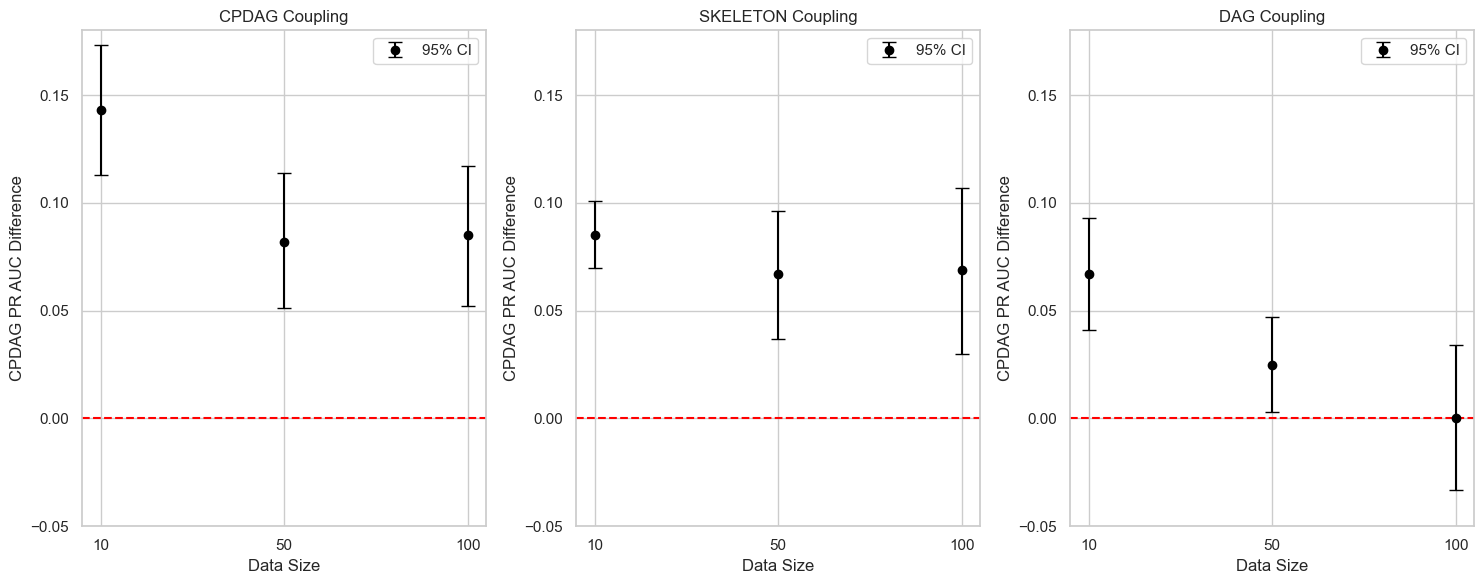

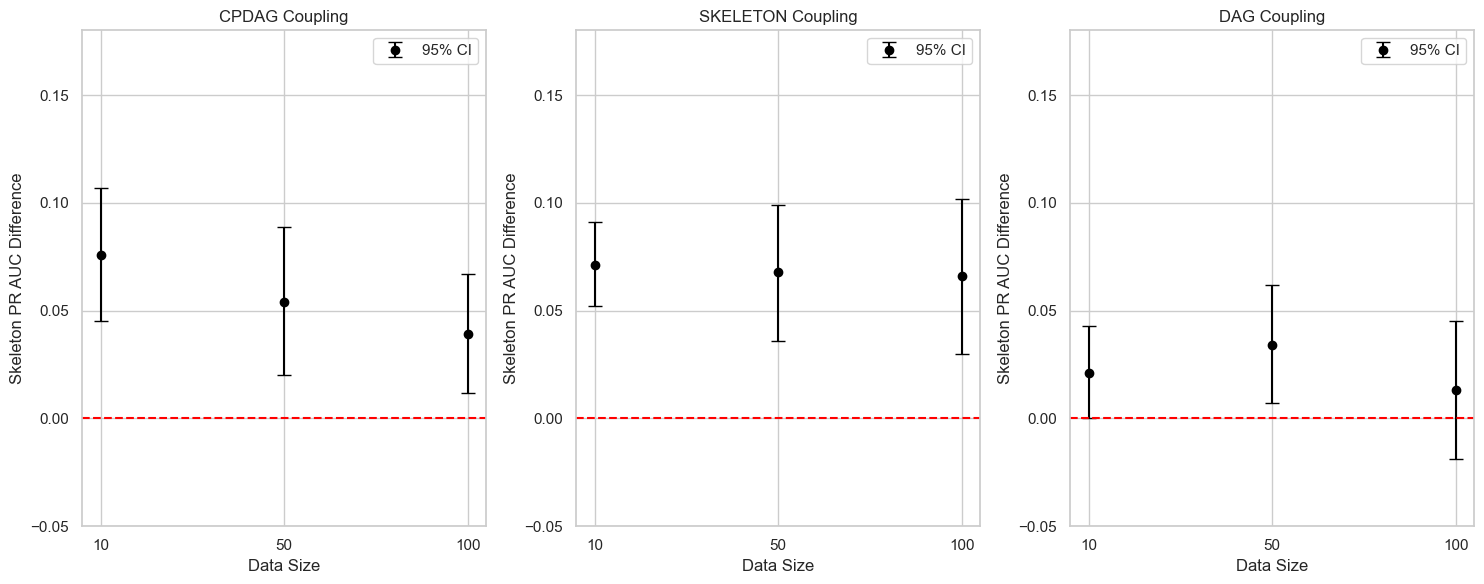

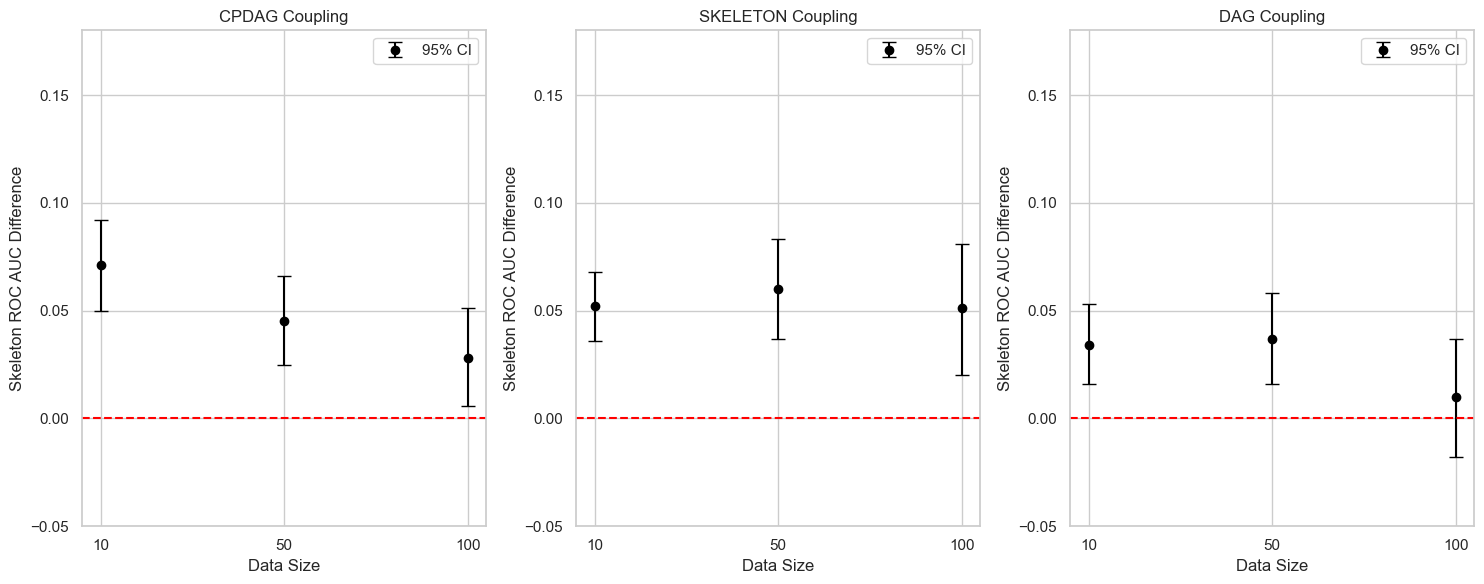

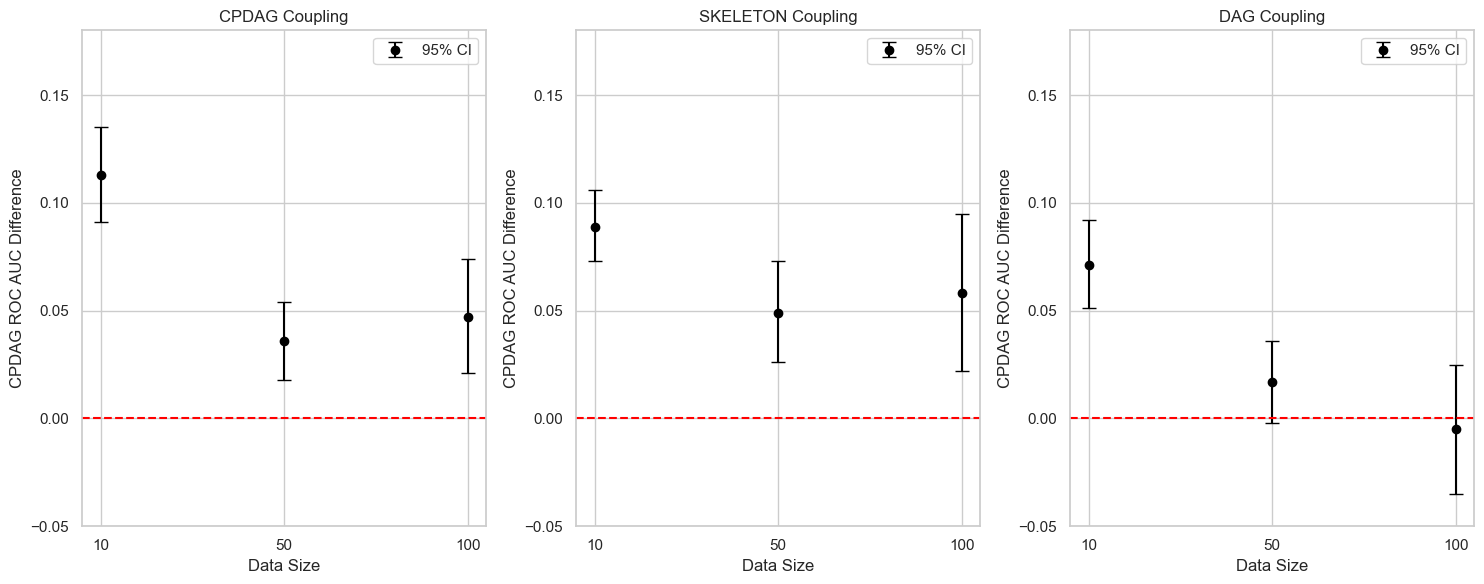

In [8]:
plot_method(df_prcpdag, 'CPDAG PR AUC Difference', 'Coupling')
plot_method(df_prskeleton, 'Skeleton PR AUC Difference', 'Coupling')
plot_method(df_roc_skeleton, 'Skeleton ROC AUC Difference', 'Coupling')
plot_method(df_roc_cpdag, 'CPDAG ROC AUC Difference', 'Coupling')